## **Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
zip_file_path = '/content/drive/MyDrive/Cofee Shop Sales.zip'

In [4]:
import zipfile
import os
# Directory where you want to extract the contents
extract_to_directory = '/content/drive/MyDrive/ExtractedFiles'
os.makedirs(extract_to_directory, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the ZIP archive
    print("Files in ZIP:", zip_ref.namelist())
    zip_ref.extract('Coffee Shop Sales.xlsx', extract_to_directory)
print(f"Coffee Shop Sales.xlsx has been extracted to {extract_to_directory}")


Files in ZIP: ['Coffee Shop Sales.xlsx']
Coffee Shop Sales.xlsx has been extracted to /content/drive/MyDrive/ExtractedFiles


In [5]:
file_path = '/content/drive/MyDrive/ExtractedFiles/Coffee Shop Sales.xlsx'
# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)




## **Examining Dataset:**

In [6]:
print(df.head())

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

## **Ensuring data integrity and consistency:**

In [7]:
df.shape

(149116, 11)

In [ ]:
df.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [ ]:
df.dtypes

,0
transaction_id,int64
transaction_date,datetime64[ns]
transaction_time,object
transaction_qty,int64
store_id,int64
store_location,object
product_id,int64
unit_price,float64
product_category,object
product_type,object


**Converting Transaction Time to Timedelta Format**

In [ ]:
df['transaction_time'] = df['transaction_time'].astype(str)
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])


In [ ]:
df['datetime']=df['transaction_date']+df['transaction_time']

In [ ]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,datetime,total_sales,year,month,day
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,1.386294,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11,2.772589,2023,January,Sunday
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,1.410987,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:56,2.821974,2023,January,Sunday
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,1.704748,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:14:04,3.409496,2023,January,Sunday
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,1.098612,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:20:24,1.098612,2023,January,Sunday
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,1.410987,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:22:41,2.821974,2023,January,Sunday


In [ ]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:\n", numerical_cols)
# Check for negative values in numerical columns
for col in numerical_cols:
    if (df[col] < 0).any():
        print(f"Column '{col}' contains negative values.")
    else:
        print(f"Column '{col}' does not contain negative values.")

Numerical columns:
 Index(['transaction_id', 'transaction_qty', 'store_id', 'product_id',
       'unit_price'],
      dtype='object')
Column 'transaction_id' does not contain negative values.
Column 'transaction_qty' does not contain negative values.
Column 'store_id' does not contain negative values.
Column 'product_id' does not contain negative values.
Column 'unit_price' does not contain negative values.


In [ ]:
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:\n", categorical_cols)


Categorical columns:
 Index(['store_location', 'product_category', 'product_type', 'product_detail'], dtype='object')


**Calculating and Aggregating Total Sales by Product**

In [8]:
# Calculate total sales
df['total_sales'] = df['transaction_qty'] * df['unit_price']
product_revenue = df.groupby('product_id')['total_sales'].sum()
print(product_revenue)


product_id
1     3852.00
2     3294.00
3     2492.75
4     3067.50
5     2220.00
       ...   
81    6163.00
82    2935.00
83    4509.00
84    2126.40
87    8902.20
Name: total_sales, Length: 80, dtype: float64


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,datetime
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,1.438276,5.342063,47.918607,3.382219,2023-04-16 00:04:47.989404160
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,1.000000,3.000000,1.000000,0.800000,2023-01-01 07:06:11
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,1.000000,3.000000,33.000000,2.500000,2023-03-06 13:37:08
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,1.000000,5.000000,47.000000,3.000000,2023-04-24 08:24:32.500000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,2.000000,8.000000,60.000000,3.750000,2023-05-30 07:16:13
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,8.000000,8.000000,87.000000,45.000000,2023-06-30 20:57:19
std,43153.600016,NaN,0 days 03:45:57.901686173,0.542509,2.074241,17.930020,2.658723,NaN


In [ ]:
df.describe(include='object')

,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116
unique,3,9,29,80
top,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,50735,58416,17183,3076


## **Examining product_category column:**

In [ ]:
df["product_category"].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery',
       'Packaged Chocolate'], dtype=object)

<ipython-input-45-08e08e4b1e9c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_category', data=df, palette='viridis')


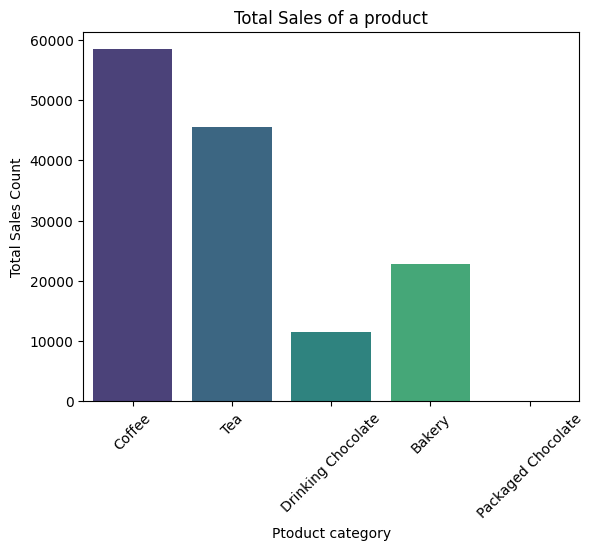

In [ ]:

# Create a count plot for total sales by month
plt.figure()
sns.countplot(x='product_category', data=df, palette='viridis')
plt.xlabel('Ptoduct category')
plt.ylabel('Total Sales Count')
plt.title('Total Sales of a product')
plt.xticks(rotation=45)
plt.show()



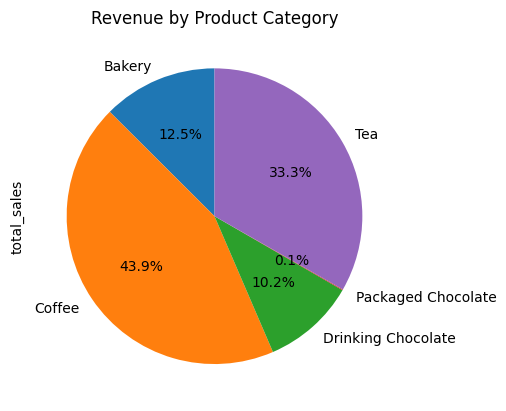

In [ ]:
# Revenue by product category
revenue_by_category = df.groupby('product_category')['total_sales'].sum()
revenue_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Revenue by Product Category')
plt.show()

Coffee brings in the most revenue, making up 38.6% of their total.
Tea accounts for 28.1% of the total revenue, making it the second-biggest revenue driver. This strong contribution highlights a significant demand for tea, suggesting that customers are really enjoying the range of tea products available.
Other notable categories include Bakery items, which make up 11.8% of the revenue, and Drinking Chocolate at 10.4%.

Categories like Branded (1.9%), Packaged Chocolate (0.6%), Loose Tea (2.8%), and Flavours make up a smaller slice of the revenue.

**Suggestions:**

Given that coffee and tea are major revenue drivers for , there’s a real opportunity to build on their success. Introducing new flavors, seasonal options, or premium products in these categories could draw in even more customers.
.

Expanding successful product lines or introducing new options in the underperforming categories could also help reach new customers.

## **Examining transaction_date column:**

In [ ]:
# add new column year
df["year"] = df["transaction_date"].dt.year

# add new column month
df["month"] = df["transaction_date"].dt.month_name()

# add new column day
df["day"] = df["transaction_date"].dt.day_name()

In [ ]:
df["year"].unique()

array([2023], dtype=int32)

In [ ]:
df["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

### **Total Sales by Month**

<ipython-input-49-5ff3a31c93b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, palette='viridis')


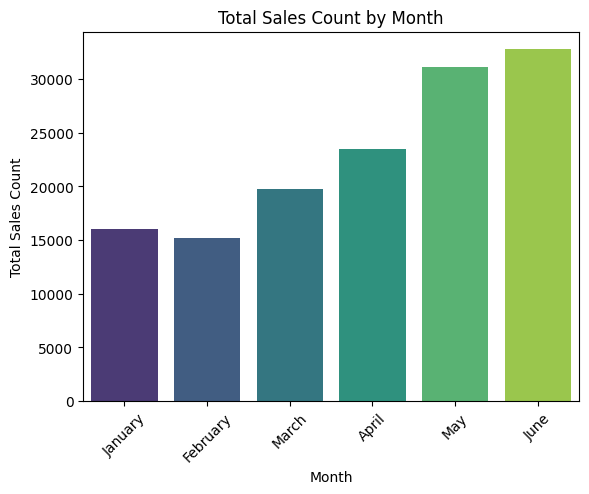

In [ ]:

# Create a count plot for total sales by month
plt.figure()
sns.countplot(x='month', data=df, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Total Sales Count')
plt.title('Total Sales Count by Month')
plt.xticks(rotation=45)
plt.show()



This shows that the highest sales are in month of june starting from january the sales are increased.

### **Sales Patterns by Day of the Week**

In [ ]:
df["day"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

<ipython-input-37-525c922d673d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=df, palette='YlOrRd')


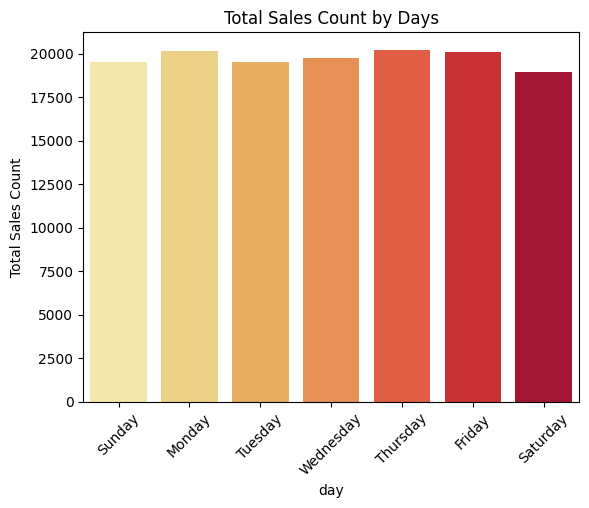

In [ ]:
# Create a count plot for total sales by month
plt.figure()
sns.countplot(x='day', data=df, palette='YlOrRd')
plt.ylabel('Total Sales Count')
plt.title('Total Sales Count by Days')
plt.xticks(rotation=45)
plt.show()


The chart shows that sales remain fairly steady throughout the week, with only small differences from day to day.

### **Hourly Sales Patterns**

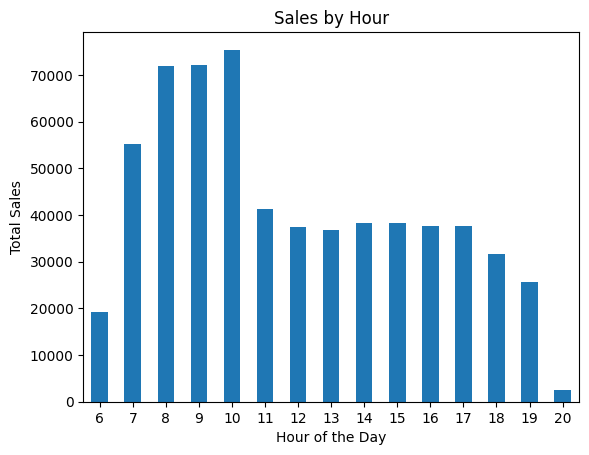

In [ ]:


# Plot the sales by hour
import matplotlib.pyplot as plt
df['Hour'] = df['datetime'].apply(lambda x: x.hour)
sales_by_hour = df.groupby('Hour')['total_sales'].sum()
sales_by_hour.plot(kind='bar')
plt.title('Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)  # Keeps the labels upright for readability
plt.show()

The hourly sales data reveals that peak sales occur between 7 a.m. and 11 a.m., indicating that people are most likely to buy coffee and tea during breakfast hours. This suggests that coffee and tea are popular choices to start the day, with customers seeking their favorite beverages in the morning.
Sales hold steady from 12 p.m. to 5p.m., indicating a consistent flow of customers during lunchtime and early afternoon.
Sales experience a noticeable decline after 5 p.m., with a sharp drop after 7 p.m.

**Recommendations:**
Morning Focus: Take advantage of the morning rush by introducing special promotions or new breakfast items to keep the momentum going.

Boost Lunch: Strengthen midday sales with lunch specials or combo deals to maintain and potentially grow the steady traffic during this time.

Evening Appeal: To draw in more customers during the evening, consider hosting events, offering discounts, or promoting items specifically for the post-work crowd.

### **Examining Unit_price column**

In [ ]:

df["unit_price"].unique()

array([ 3.  ,  3.1 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,  2.5 ,
        4.75,  3.25,  4.  ,  2.2 ,  2.45,  0.8 ,  8.95, 21.  , 28.  ,
        6.4 , 19.75, 12.  , 18.  ,  9.5 , 10.  , 20.45,  9.25, 22.5 ,
       14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  5.63,
        4.69, 45.  , 23.  ,  2.1 ,  2.65])

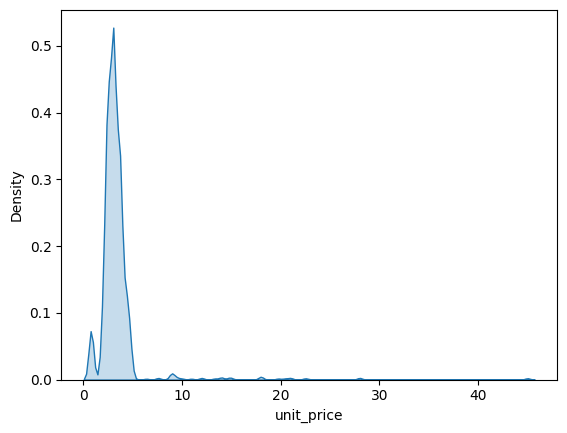

In [ ]:
sns.kdeplot(x = df["unit_price"], fill = True)
plt.show()

The price data is rightly skewed which shows that mostly prices are low except a few ones for which prices are high.

### **Examining product_type column:**

In [ ]:
df["product_type"].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

<ipython-input-13-721de2d5e3f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='product_type', data=df, palette='viridis')


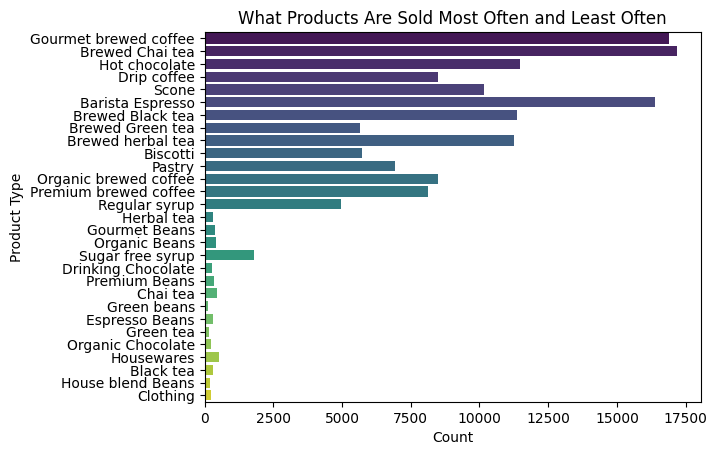

In [ ]:

# Set the figure size for the plot
plt.figure()
# Create a count plot for the 'product_type' column
sns.countplot(y='product_type', data=df, palette='viridis')
# Set the title and labels
plt.title('What Products Are Sold Most Often and Least Often')
plt.xlabel('Count')
plt.ylabel('Product Type')

# Display the plot
plt.show()


The results show that coffee is most saled product followed by tea.


### **Examining store_location column:**

In [ ]:
df_location=df.groupby('store_location').agg({
    'total_sales':'sum'
})
df_location

,total_sales
store_location,
Astoria,232243.91
Hell's Kitchen,236511.17
Lower Manhattan,230057.25


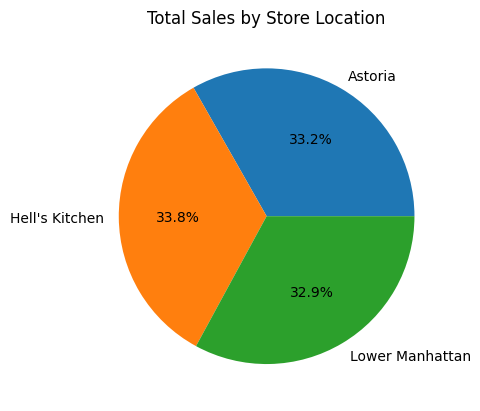

In [ ]:
# Plotting the pie chart
plt.figure()
plt.pie(df_location['total_sales'], labels=df_location.index, autopct='%1.1f%%')
plt.title('Total Sales by Store Location')
plt.show()

The store sales are almost similar for three locations with highest for Hells Kitchen.

## **Predictive modeling techniques to forecast future profits:**

## **Random Forest Forecasting:**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Combine date and time into a single datetime column
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str))

# Set datetime as index
df.set_index('transaction_datetime', inplace=True)

# Resample data to daily frequency and sum total sales
daily_data = df['total_sales'].resample('D').sum()
daily_data.head()

,total_sales
transaction_datetime,
2023-01-01,2508.20
2023-01-02,2403.35
2023-01-03,2565.00
2023-01-04,2220.10
2023-01-05,2418.85


In [ ]:
daily_data.tail()

,total_sales
transaction_datetime,
2023-06-26,5875.90
2023-06-27,5975.65
2023-06-28,4728.90
2023-06-29,4450.75
2023-06-30,5481.32


Mean Squared Error: 111624.50544714776
Mean Absolute Percentage Error (MAPE): 6.65%


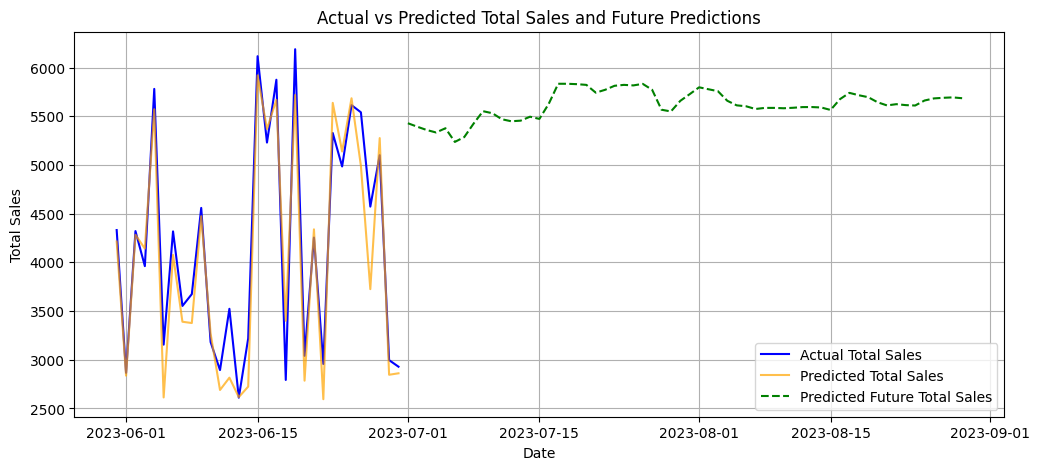

In [ ]:

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data.values.reshape(-1, 1))

# Prepare sequences of data
seq_length = 30  # Length of historical data to use
X = []
y = []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y.append(scaled_data[i + seq_length])

X = np.array(X)
y = np.array(y).reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for Random Forest input
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_reshaped, y_train.ravel())

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Inverse transform predictions
y_test_inverse = scaler.inverse_transform(y_test)
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f'Mean Squared Error: {mse}')

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_indices = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100

mape = calculate_mape(y_test_inverse, y_pred_inverse)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Forecast future sales
future_steps = 60
last_sequence = scaled_data[-seq_length:]
future_predictions = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, -1))
    next_value = model.predict(last_sequence_reshaped)[0]
    future_predictions.append(next_value)
    next_value = np.array([next_value]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_value, axis=0)

# Inverse transform future predictions
future_predictions_inverse = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Prepare the index for future predictions
future_dates = pd.date_range(start=daily_data.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')

# Plot actual vs predicted total sales along with future predictions
plt.figure(figsize=(12,5))

# Plot actual and predicted total sales
plt.plot(daily_data.index[-len(y_test_inverse):], y_test_inverse, label='Actual Total Sales', color='blue')
plt.plot(daily_data.index[-len(y_pred_inverse):], y_pred_inverse, label='Predicted Total Sales', color='orange', alpha=0.7)

# Plot future predictions
plt.plot(future_dates, future_predictions_inverse, label='Predicted Future Total Sales', color='green', linestyle='--')

plt.title('Actual vs Predicted Total Sales and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


# **XG BOOST**

Mean Squared Error: 127781.64354559996
Mean Absolute Percentage Error (MAPE): 7.73%


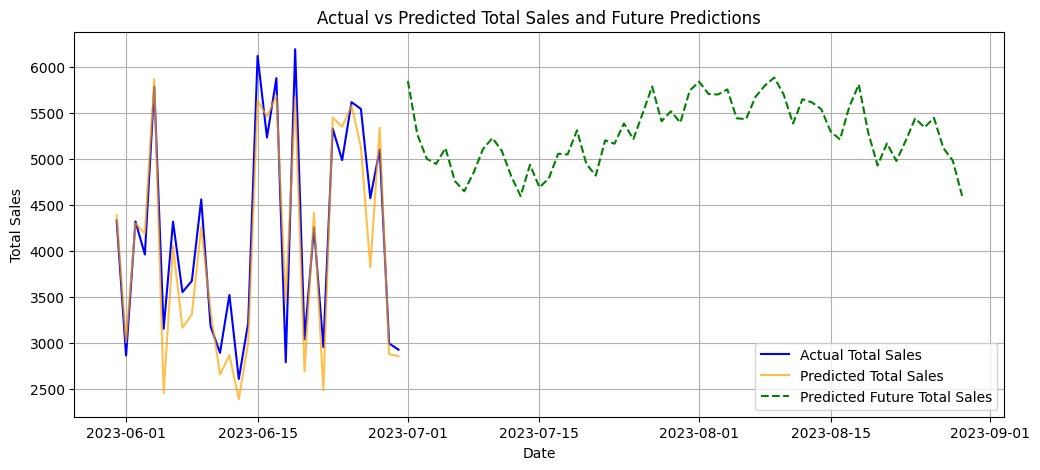

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data.values.reshape(-1, 1))

# Prepare sequences of data
seq_length = 30  # Length of historical data to use
X = []
y = []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y.append(scaled_data[i + seq_length])

X = np.array(X)
y = np.array(y).reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for XGBoost input
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Train XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train_reshaped, y_train.ravel())

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Inverse transform predictions
y_test_inverse = scaler.inverse_transform(y_test)
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f'Mean Squared Error: {mse}')

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_indices = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100

mape = calculate_mape(y_test_inverse, y_pred_inverse)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Forecast future sales (example for 60 days)
future_steps = 60
last_sequence = scaled_data[-seq_length:]
future_predictions = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, -1))
    next_value = model.predict(last_sequence_reshaped)[0]
    future_predictions.append(next_value)
    next_value = np.array([next_value]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_value, axis=0)

# Inverse transform future predictions
future_predictions_inverse = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Prepare the index for future predictions
future_dates = pd.date_range(start=daily_data.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')

# Plot actual vs predicted total sales along with future predictions
plt.figure(figsize=(12,5))

# Plot actual and predicted total sales
plt.plot(daily_data.index[-len(y_test_inverse):], y_test_inverse, label='Actual Total Sales', color='blue')
plt.plot(daily_data.index[-len(y_pred_inverse):], y_pred_inverse, label='Predicted Total Sales', color='orange', alpha=0.7)

# Plot future predictions
plt.plot(future_dates, future_predictions_inverse, label='Predicted Future Total Sales', color='green', linestyle='--')

plt.title('Actual vs Predicted Total Sales and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


# **LSTM**

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data.values.reshape(-1, 1))

# Prepare sequences of data
seq_length = 30  # Length of historical data to use
X = []
y = []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y.append(scaled_data[i + seq_length])

X = np.array(X)
y = np.array(y).reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - loss: 0.2277 - val_loss: 0.2386
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1555 - val_loss: 0.1276
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0788 - val_loss: 0.0203
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0222 - val_loss: 0.0292
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0399 - val_loss: 0.0171
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0292 - val_loss: 0.0354
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0313 - val_loss: 0.0354
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0261 - val_loss: 0.0217
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0178 - val_loss: 0.0136
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0242 - val_loss: 0.0138
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0208 - val_loss: 0.0150
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0183 - val_l

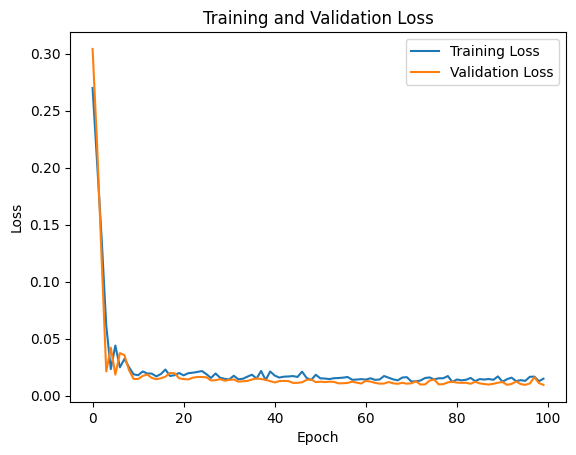

In [19]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure()

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add titles and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [20]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions
y_test_inverse = scaler.inverse_transform(y_test)
y_pred_inverse = scaler.inverse_transform(y_pred)

# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f'Mean Squared Error: {mse}')

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_indices = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100

mape = calculate_mape(y_test_inverse, y_pred_inverse)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
Mean Squared Error: 116938.18481020915
Mean Absolute Percentage Error (MAPE): 5.91%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

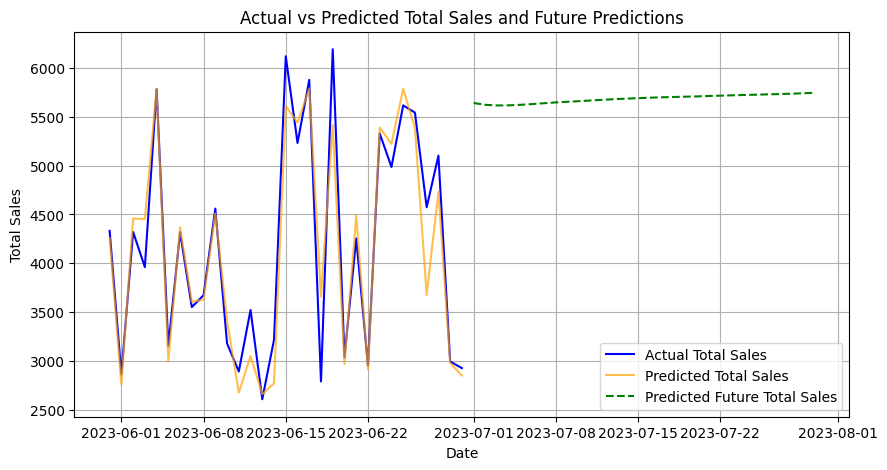

In [22]:
# Forecast future sales (example for 60 days)
future_steps = 30
last_sequence = scaled_data[-seq_length:]
future_predictions = []

for _ in range(future_steps):
    # Reshape the last sequence for LSTM prediction
    last_sequence_reshaped = last_sequence.reshape((1, seq_length, 1))

    # Predict the next value
    next_value = model.predict(last_sequence_reshaped)

    # Append the predicted value to future_predictions
    future_predictions.append(next_value[0, 0])  # Extract single value from the prediction

    # Update last_sequence by appending the predicted value
    last_sequence = np.append(last_sequence[1:], [[next_value[0, 0]]], axis=0)

# Convert future_predictions to a NumPy array and reshape for inverse transformation
future_predictions = np.array(future_predictions).reshape(-1, 1)

# Inverse transform future predictions
future_predictions_inverse = scaler.inverse_transform(future_predictions)

# Prepare the index for future predictions
future_dates = pd.date_range(start=daily_data.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')

# Plot actual vs predicted total sales along with future predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot actual and predicted total sales
plt.plot(daily_data.index[-len(y_test_inverse):], y_test_inverse, label='Actual Total Sales', color='blue')
plt.plot(daily_data.index[-len(y_pred_inverse):], y_pred_inverse, label='Predicted Total Sales', color='orange', alpha=0.7)

# Plot future predictions
plt.plot(future_dates, future_predictions_inverse, label='Predicted Future Total Sales', color='green', linestyle='--')

plt.title('Actual vs Predicted Total Sales and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


LSTM PRAC: